<a href="https://colab.research.google.com/github/WoradeeKongthong/image_classification/blob/master/Fashion_MNIST_with_modelcheckpoint_and_earlystopping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset

## Load the Fashion-MNIST dataset
Labels  

Each training and test example is assigned to one of the following labels:

0 T-shirt/top  
1 Trouser  
2 Pullover  
3 Dress  
4 Coat  
5 Sandal  
6 Shirt  
7 Sneaker  
8 Bag  
9 Ankle boot  

In [1]:
from tensorflow.keras.datasets import fashion_mnist

In [2]:
# load dataset
(trainX, trainy), (testX, testy) = fashion_mnist.load_data()

In [3]:
from matplotlib import pyplot as plt

Train X shape :  (60000, 28, 28)
Train y shape :  (60000,)
Test X shape :  (10000, 28, 28)
Test y shape :  (10000,)


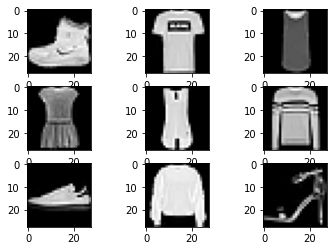

In [4]:
# summarize loaded dataset
print('Train X shape : ', trainX.shape)
print('Train y shape : ', trainy.shape)
print('Test X shape : ', testX.shape)
print('Test y shape : ', testy.shape)

# plot some images
for i in range(9):
  plt.subplot(330 + i + 1)
  plt.imshow(trainX[i], cmap=plt.get_cmap('gray'))
plt.show()

## Preprocess dataset

In [5]:
import numpy as np

In [6]:
# reshape trainX and testX to have single channel
trainX = np.expand_dims(trainX, axis=3)
testX = np.expand_dims(testX, axis=3)

print('Train X shape : ', trainX.shape)
print('Test X shape : ', testX.shape)

Train X shape :  (60000, 28, 28, 1)
Test X shape :  (10000, 28, 28, 1)


In [7]:
print(trainy[:10])

[9 0 0 3 0 2 7 2 5 5]


In [9]:
from tensorflow.keras.utils import to_categorical

In [10]:
# one hot encode trainy and testy 
#(keras.utils.to_categorical converts a class vector (integers) to binary class matrix)

trainy = to_categorical(trainy)
testy = to_categorical(testy)

print('Train y shape : ', trainy.shape)
print('Test y shape : ', testy.shape)
print('Train y examples :')
for i in range(9):
  print(trainy[i])

Train y shape :  (60000, 10)
Test y shape :  (10000, 10)
Train y examples :
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [11]:
# check Pixel Data
print(trainX.dtype)
print('min : %d, max : %d' %(trainX.min(), trainX.max()))

uint8
min : 0, max : 255


In [12]:
# convert from uint8 to float32
trainX = trainX.astype('float32')
testX = testX.astype('float32')

# normalize to range 0-1
trainX = trainX / 255.0
testX = testX / 255.0

# check Pixel Data
print(trainX.dtype)
print('min : %d, max : %d' %(trainX.min(), trainX.max()))

float32
min : 0, max : 1


# Define Model

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import SGD

In [14]:
# define simple CNN model
def define_model():
  model = Sequential()
  model.add(Conv2D(32, (3,3),padding='same', activation='relu', kernel_initializer='he_uniform', input_shape=(28,28,1)))
  model.add(MaxPooling2D((2,2)))
  model.add(Flatten())
  model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
  model.add(Dense(10, activation='softmax'))

  # compile model
  opt = SGD(lr=0.01, momentum=0.9)
  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [15]:
model = define_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               627300    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1010      
Total params: 628,630
Trainable params: 628,630
Non-trainable params: 0
_________________________________________________________________


/home/samantha/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


# fit the mode include model checkpoint and early stopping
**ModelCheckpoint** : the model will only be saved to disk if the validation accuracy of the model in current epoch is greater than what it was in the last epoch.  


**EarlyStopping** : helps us to stop the training of the model early if there is no increase in the parameter which I have set to monitor in EarlyStopping.


In [17]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [18]:
# create checkpoint
checkpoint = ModelCheckpoint("imgclf_1.h5", monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)

# create earlystopping
early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=10, verbose=1, mode='auto')

# fit the model
history = model.fit(trainX, trainy, epochs=50, batch_size=32, validation_split=0.2, callbacks=[checkpoint, early])

Epoch 1/50
1500/1500 [==============================] - 28s 18ms/step - loss: 0.4456 - accuracy: 0.8401 - val_loss: 0.3352 - val_accuracy: 0.8802

Epoch 00001: val_accuracy improved from -inf to 0.88025, saving model to imgclf_1.h5
Epoch 2/50
1500/1500 [==============================] - 34s 23ms/step - loss: 0.2980 - accuracy: 0.8918 - val_loss: 0.3361 - val_accuracy: 0.8773

Epoch 00002: val_accuracy did not improve from 0.88025
Epoch 3/50
1500/1500 [==============================] - 31s 20ms/step - loss: 0.2538 - accuracy: 0.9064 - val_loss: 0.2751 - val_accuracy: 0.9004

Epoch 00003: val_accuracy improved from 0.88025 to 0.90042, saving model to imgclf_1.h5
Epoch 4/50
1500/1500 [==============================] - 33s 22ms/step - loss: 0.2243 - accuracy: 0.9182 - val_loss: 0.2670 - val_accuracy: 0.9035

Epoch 00004: val_accuracy improved from 0.90042 to 0.90350, saving model to imgclf_1.h5
Epoch 5/50
1500/1500 [==============================] - 28s 19ms/step - loss: 0.1987 - accuracy:

## Results

In [ ]:
# plot learning curve and print model performance
def summarize_model(history):
  # learning curve
  plt.figure(figsize=(8,8))
  
  # plot loss
  plt.subplot(211)
  plt.plot(history.history['loss'], color='green', label='train')
  plt.plot(history.history['val_loss'], color='orange', label='validation')
  plt.title('Cross Entropy Loss')
  plt.legend()

  # plot accuracy
  plt.subplot(212)
  plt.plot(history.history['accuracy'], color='green', label='train')
  plt.plot(history.history['val_accuracy'], color='orange', label='validation')
  plt.title('Classification Accuracy')
  plt.legend()

  plt.show()

  _, train_acc = model.evaluate(trainX, trainy, verbose=0)
  _, test_acc = model.evaluate(testX, testy, verbose=0)
  # model performance
  print('Model Performance (Accuracy)')
  print('Train : %.3f' %train_acc)
  print('Test : %.3f' %test_acc)

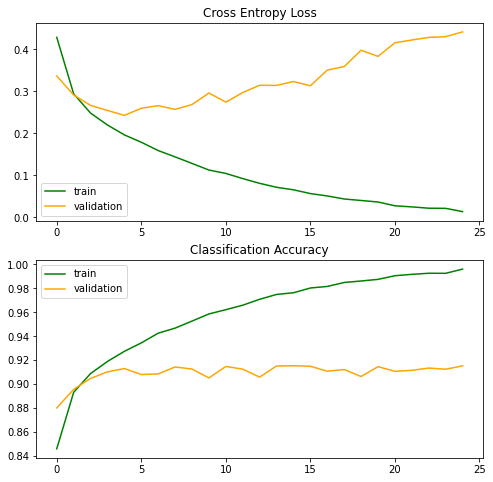

Model Performance (Accuracy)
Train : 0.982
Test : 0.912


In [ ]:
summarize_model(history)

# Make Prediction from saved model
Make a prediction on a single image with the saved final model  

Labels : 
0 T-shirt/top
1 Trouser
2 Pullover
3 Dress
4 Coat
5 Sandal
6 Shirt
7 Sneaker
8 Bag
9 Ankle boot

In [ ]:
from tensorflow.keras.preprocessing import image

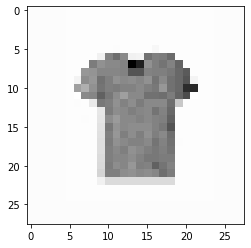

prediction :  8


In [ ]:
# load image and plot
img = image.load_img("tshirt.jpg",target_size=(28,28), color_mode = "grayscale")
plt.imshow(img, cmap='Greys_r')
plt.show()

# convert image to array
img = np.asarray(img)
# reshape to 1 sample dataset
img = img.reshape(1,28,28,1)
# normalize the pixel data
img = img.astype('float32')
img = img / 255.0

from keras.models import load_model
# load model
saved_model = load_model("imgclf_1.h5")

# make prediction
result = saved_model.predict(img)
print('prediction : ', result.argmax())

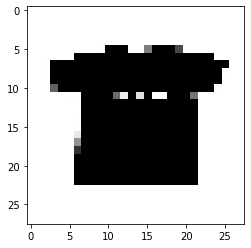

prediction :  8


In [ ]:
# load image and plot
img = image.load_img("tshirt1.jpg",target_size=(28,28), color_mode = "grayscale")
plt.imshow(img, cmap='Greys_r')
plt.show()

# convert image to array
img = np.asarray(img)
# reshape to 1 sample dataset
img = img.reshape(1,28,28,1)
# normalize the pixel data
img = img.astype('float32')
img = img / 255.0

from keras.models import load_model
# load model
saved_model = load_model("imgclf_1.h5")

# make prediction
result = saved_model.predict(img)
print('prediction : ', result.argmax())

Note : both wrong predictions  
Need to develop improved models.